<div style="text-align: center; font-family: Arial, sans-serif; padding: 40px;">

  <!-- College Logo -->
  <div style="margin-bottom: 20px;">
      <img src="george_brown_logo.png" alt="George Brown College Logo" width="150"/>
  </div>

  <!-- Title Section -->
  <h1 style="color: #1E90FF; font-size: 36px; font-weight: bold;">Case Study 1 – BUS4023</h1>

  <!-- Submission Date -->
  <h2 style="color: #1E90FF; font-size: 24px; background-color: #dceeff; display: inline-block; padding: 10px; border-radius: 5px;">Submission Date: 04/11/2024</h2>

  <!-- Team Members Title -->
  <h2 style="color: #FF6347; font-size: 28px; font-weight: bold; margin-top: 20px;">Team Members</h2>

  <!-- Team Members Names -->
  <p style="color: #FF6347; font-size: 20px; font-weight: bold; line-height: 1.8;">
    Aditya Shah - 101521301<br>
    Shrey Praveen Porwal - 101435950<br>
    Vismay Kalpeshkumar Shah - 101520706<br>
    Nidhi - 101521584<br>
    Pujitha Chimata - 101568576<br>
    Mohammed Waseefuddin - 101532062<br>
    Dhruv Jani - 101525264
    
  </p>

  <!-- Decorative Divider Line -->
  <hr style="border: none; border-top: 2px solid #1E90FF; width: 60%; margin: 20px auto;">

  <!-- Footer with College Name -->
  <p style="font-size: 22px; color: #1E90FF; font-weight: bold; text-align: center;">George Brown College, Toronto</p>

</div>


## **Table of Contents**
1. [Executive Summary](#Executive-Summary)
2. [Business Problem](#Business-Problem)
3. [Cleaning Data, Handling Duplicates and Removing Outliers](#Cleaning-Data,-Handling-Duplicates-and-Removing-Outliers)
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
5. [Feature Selection/Engineering](#Feature-Selection/Engineering)
6. [Model Selection for Purchase as an Outcome](#Model-Selection-1)
7. [Logistic Regression for Purchase](#Logistic-Regression)
8. [Decision Tree for Purchase](#Decision-Tree-for-Purchase)
9. [Conclusion 1](#Conslusion-1)
10. [Model Selection for Spending as an Outcome](#Model-Selection-for-Spending-as-an-Outcome)
11. [Linear Regression](#Linear-Regression)
12. [Decision Tree for Spending](#Decision-Tree-for-Regression)
13. [Conclusion 2](#Conslusion-2)
14. [Interpretation and Application](#Interpretation-and-Application)

## **Executive Summary**
This project applies data mining to the "Tayko3.csv" dataset to uncover insights supporting business decisions. Key tasks include data cleaning, exploratory analysis, and feature engineering to prepare a high-quality dataset. Predictive models, such as linear and logistic regression, are trained and evaluated using accuracy, precision, and recall metrics. The findings, based on model performance and identified patterns, offer actionable insights to inform data-driven strategies for enhanced business outcomes.

## **Business Problem**

Tayko, an e-commerce retailer, aims to understand and enhance customer purchasing behavior by analyzing key factors that influence spending, purchase frequency, and channel effectiveness. With the dataset containing purchase data, order frequency, and marketing sources, Tayko needs to uncover actionable insights to improve sales, customer engagement, and overall profitability.

The target variable, Purchase, is binary, indicating whether a customer made a purchase. Additionally, understanding Spending behavior will allow Tayko to segment and engage high-value customers more effectively. By identifying correlations between purchase behavior and marketing channels, Tayko can optimize its marketing efforts and resource allocation.

Key questions to address:

What customer characteristics (e.g., order frequency, recency of engagement) are strongly associated with higher spending and purchase activity?
How effective are different marketing channels (e.g., source_a, source_u) in driving purchases?
What strategies can be employed to increase engagement among frequent buyers and re-engage inactive customers?


In [5]:
import numpy as np
import pandas as pd

In [7]:
tayko = pd.read_csv('Tayko3.csv')

In [9]:
tayko.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0


In [11]:
tayko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   sequence_number       2000 non-null   int64
 1   US                    2000 non-null   int64
 2   source_a              2000 non-null   int64
 3   source_c              2000 non-null   int64
 4   source_b              2000 non-null   int64
 5   source_d              2000 non-null   int64
 6   source_e              2000 non-null   int64
 7   source_m              2000 non-null   int64
 8   source_o              2000 non-null   int64
 9   source_h              2000 non-null   int64
 10  source_r              2000 non-null   int64
 11  source_s              2000 non-null   int64
 12  source_t              2000 non-null   int64
 13  source_u              2000 non-null   int64
 14  source_p              2000 non-null   int64
 15  source_x              2000 non-null   int64
 16  source

# Cleaning Data, Handling Duplicates and Removing Outliers

## Checking for Null Values

In [15]:
# Display the count of null values for each column
null_values = tayko.isnull().sum()
print("Null values in each column:\n", null_values)


Null values in each column:
 sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64


No Null Values are there

## Identifying Duplicates

In [19]:
# Identify duplicate rows
duplicates = tayko[tayko.duplicated()]

print("Number of duplicate rows:", duplicates.shape[0])
if not duplicates.empty:
    print("Duplicate rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


## Handling Outliers

### Checking for Outliers

In [23]:
tayko.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.62500
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.78261
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,2.00000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,153.00000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.00000


In [25]:
# function to count outliers using IQR method
def count_outliers(tayko, column_name):
    Q1 = tayko[column_name].quantile(0.25)
    Q3 = tayko[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return the count of outliers
    return ((tayko[column_name] < lower_bound) | (tayko[column_name] > upper_bound)).sum()

# Count outliers in 'Spending' and 'Freq'
outliers_spending = count_outliers(tayko, 'Spending')
outliers_freq = count_outliers(tayko, 'Freq')
outliers_last_update_days_ago = count_outliers(tayko, 'last_update_days_ago')
outliers_1st_update_days_ago = count_outliers(tayko, '1st_update_days_ago')

print(f"Outliers in Spending: {outliers_spending}")
print(f"Outliers in Freq: {outliers_freq}")
print(f"Outliers in last_update_days_ago: {outliers_last_update_days_ago}")
print(f"Outliers in 1st_update_days_ago: {outliers_1st_update_days_ago}")

Outliers in Spending: 110
Outliers in Freq: 114
Outliers in last_update_days_ago: 0
Outliers in 1st_update_days_ago: 0


### Transforming Outliers

In [28]:
from sklearn.preprocessing import RobustScaler

tayko_cleaned = tayko.copy()

tayko_cleaned['log_Spending'] = np.log(tayko_cleaned['Spending'] + 1)

# Define a threshold (e.g., values above the 90th percentile)
threshold = tayko_cleaned['Freq'].quantile(0.90)

# Apply log transformation conditionally
tayko_cleaned['transformed_Freq'] = np.where(
    tayko_cleaned['Freq'] > threshold,
    np.log(tayko_cleaned['Freq'] + 1),
    tayko_cleaned['Freq']
)

In [29]:
tayko_cleaned.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending,log_Spending,transformed_Freq
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.62500,2.474009,1.206058
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.78261,2.555239,0.840473
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,2.00000,1.039721,1.000000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,153.00000,5.036953,2.000000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.00000,7.313887,3.000000


In [30]:
# function to count outliers using IQR method
def count_outliers(tayko, column_name):
    Q1 = tayko[column_name].quantile(0.25)
    Q3 = tayko[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    # Return the count of outliers
    return ((tayko[column_name] < lower_bound) | (tayko[column_name] > upper_bound)).sum()

# Count outliers in 'Spending' and 'Freq'
outliers_spending = count_outliers(tayko_cleaned, 'log_Spending')
outliers_freq = count_outliers(tayko_cleaned, 'transformed_Freq')

print(f"Outliers in Spending after removing: {outliers_spending}")
print(f"Outliers in Freq after removing: {outliers_freq}")

Outliers in Spending after removing: 0
Outliers in Freq after removing: 0


# Exploratory Data Analysis (EDA)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

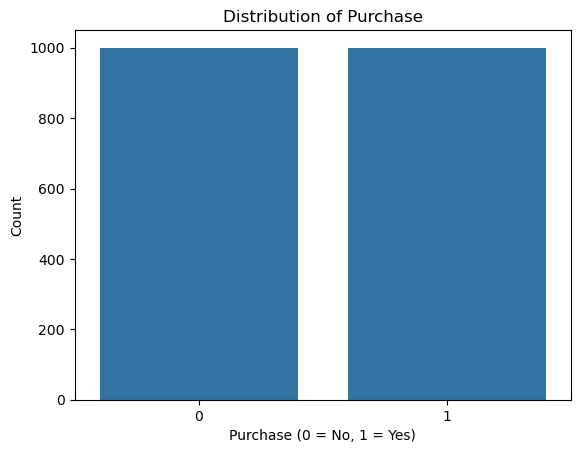

In [36]:
# Bar plot of Purchase variable
sns.countplot(data=tayko_cleaned, x='Purchase')
plt.title('Distribution of Purchase')
plt.xlabel('Purchase (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#### Both classes are relatively close in count, suggesting a reasonably balanced dataset.

<Axes: xlabel='transformed_Freq', ylabel='Purchase'>

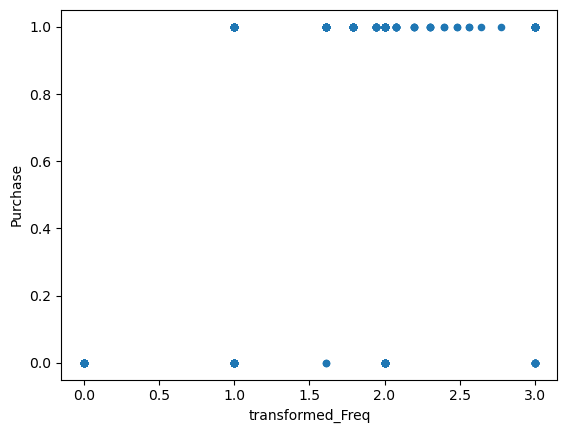

In [40]:
tayko_cleaned.plot.scatter(x='transformed_Freq', y='Purchase', legend=False)

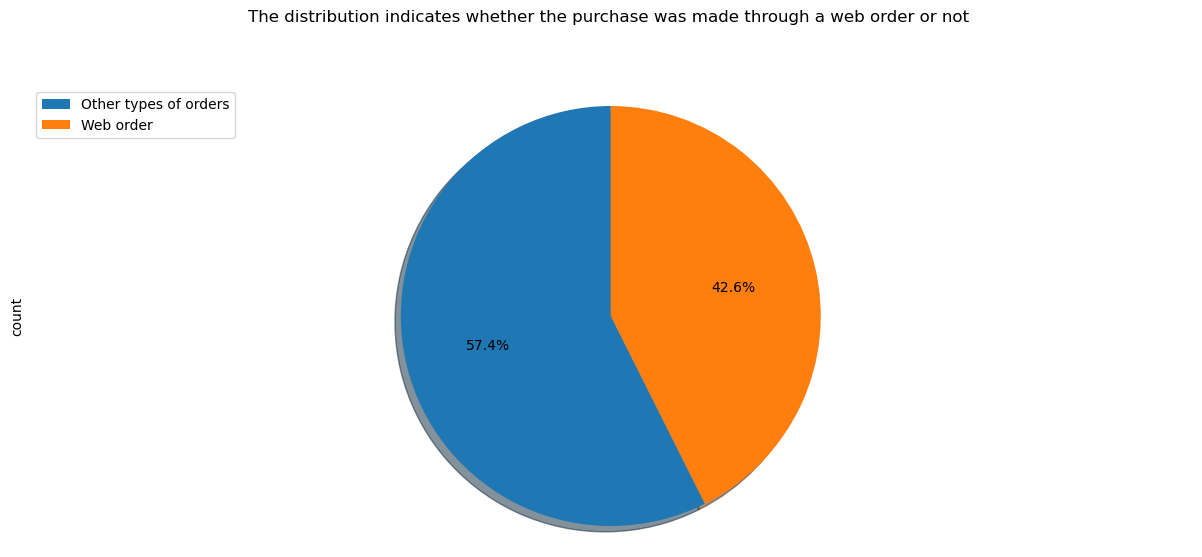

In [42]:
labels = 'Other types of orders','Web order'
tayko_cleaned['Web order'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('The distribution indicates whether the purchase was made through a web order or not ', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper left') 
 # show plot
plt.show()

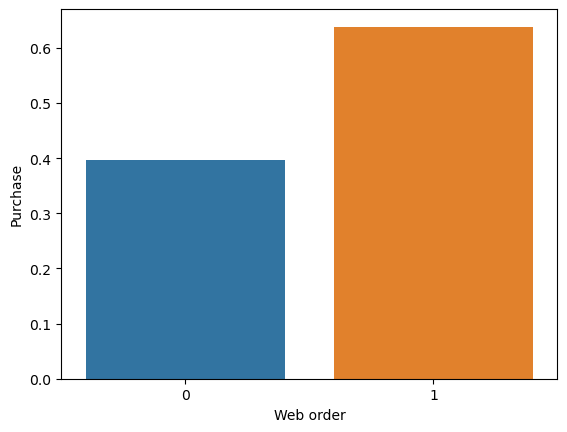

In [44]:
custom_palette = ['#1f77b4', '#ff7f0e']

sns.barplot(x='Web order', y='Purchase', data=tayko_cleaned, hue='Web order',  errorbar=None, palette=custom_palette, legend = False);
plt.show()

In [46]:
gda = tayko_cleaned[['Gender=male', 'Spending', 'Purchase']]

gda['Gender=male'].value_counts()

Gender=male
1    1049
0     951
Name: count, dtype: int64

In [48]:
purchase_by_gender = gda.groupby("Gender=male")['Purchase'].value_counts(normalize=False).unstack()
purchase_by_gender = purchase_by_gender.transpose()
purchase_by_gender

Gender=male,0,1
Purchase,,
0,465,535
1,486,514


# Feature Selection/Engineering

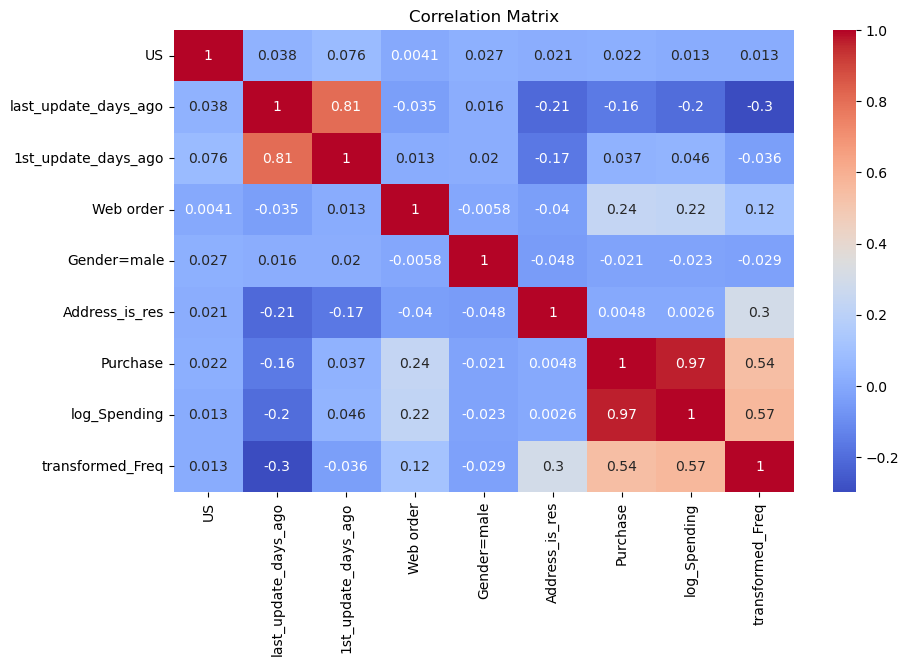

In [51]:
columns_to_drop = [
    'sequence_number', 'Spending', 'Freq', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e', 
                  'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 
                  'source_t', 'source_u', 'source_p', 'source_x', 'source_w'
]

# Drop the specified columns
tayko_cleaned_dropped = tayko_cleaned.drop(columns=columns_to_drop)


# Correlation matrix
corr_matrix = tayko_cleaned_dropped.corr()

# Visualize with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [53]:
correlation_matrix = tayko_cleaned_dropped.corr()

# Set a threshold for "high" correlation
threshold = 0.1

# Get correlations with the 'Purchase' column, sorted by absolute value
log_Spending_correlations = correlation_matrix['log_Spending'].sort_values(key=abs, ascending=False)

# Filter to keep only correlations with an absolute value above the threshold, excluding Purchase itself
high_correlations = log_Spending_correlations[(abs(log_Spending_correlations) > threshold) & (log_Spending_correlations.index != 'log_Spending')]

# Display the high correlations
print("High Correlations with log_Spending:")
print(high_correlations)

High Correlations with log_Spending:
Purchase                0.968181
transformed_Freq        0.566482
Web order               0.224404
last_update_days_ago   -0.198760
Name: log_Spending, dtype: float64


In [55]:
correlation_matrix = tayko_cleaned_dropped.corr()

# Set a threshold for "high" correlation
threshold = 0.2

# Get correlations with the 'Purchase' column
, sorted by absolute value
Purchase_correlations = correlation_matrix['Purchase'].sort_values(key=abs, ascending=False)

# Filter to keep only correlations with an absolute value above the threshold, excluding Purchase itself
high_correlations_1 = Purchase_correlations[(abs(Purchase_correlations) > threshold) & (Purchase_correlations.index != 'Purchase')]

# Display the high correlations
print("High Correlations_1 with Purchase:")
print(high_correlations_1)

High Correlations_1 with Purchase:
log_Spending        0.968181
transformed_Freq    0.540116
Web order           0.238628
Name: Purchase, dtype: float64


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the numeric columns from the correlation matrix for VIF calculation
features = tayko_cleaned[['US', 'last_update_days_ago', '1st_update_days_ago', 
                     'Web order', 'Gender=male', 'Address_is_res', 'Purchase', 
                     'transformed_Freq', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e', 
                  'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 
                  'source_t', 'source_u', 'source_p', 'source_x', 'source_w']]

# Function to calculate VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Calculate VIF and display results
vif_df = calc_vif(features)
print(vif_df)

               variables        VIF
0                     US   5.458968
1   last_update_days_ago  17.188775
2    1st_update_days_ago  25.000891
3              Web order   1.846640
4            Gender=male   2.075084
5         Address_is_res   1.680545
6               Purchase   3.648587
7       transformed_Freq   6.606548
8               source_a   3.148457
9               source_c   1.569885
10              source_b   1.958602
11              source_d   1.749923
12              source_e   2.667439
13              source_m   1.195817
14              source_o   1.567215
15              source_h   2.073742
16              source_r   1.779951
17              source_s   1.461649
18              source_t   1.367021
19              source_u   2.512670
20              source_p   1.118508
21              source_x   1.246574
22              source_w   1.996334


Moving forward to remove 1st_update_days_ago due to it's high VIF

In [60]:
tayko_cleaned=tayko_cleaned.drop(['1st_update_days_ago'],axis=1)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the numeric columns from the correlation matrix for VIF calculation
features = tayko_cleaned[['US', 'last_update_days_ago', 
                     'Web order', 'Gender=male', 'Address_is_res', 'Purchase', 
                     'transformed_Freq', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e', 
                  'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 
                  'source_t', 'source_u', 'source_p', 'source_x', 'source_w']]

# Function to calculate VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Calculate VIF and display results
vif_df = calc_vif(features)
print(vif_df)

               variables       VIF
0                     US  5.376948
1   last_update_days_ago  5.780338
2              Web order  1.844625
3            Gender=male  2.065780
4         Address_is_res  1.680545
5               Purchase  3.645556
6       transformed_Freq  5.856214
7               source_a  3.029034
8               source_c  1.569159
9               source_b  1.882784
10              source_d  1.732521
11              source_e  2.619007
12              source_m  1.194736
13              source_o  1.452038
14              source_h  2.057963
15              source_r  1.771481
16              source_s  1.458678
17              source_t  1.359508
18              source_u  2.460908
19              source_p  1.111213
20              source_x  1.238243
21              source_w  1.971679


## Splitting Data into Train and Test dataset

In [65]:
predictors = ['US', 'last_update_days_ago', 
                     'Web order', 'Gender=male', 'Address_is_res',  
                     'transformed_Freq', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e', 
                  'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 
                  'source_t', 'source_u', 'source_p', 'source_x', 'source_w']
outcome = 'Purchase'

In [67]:
Y = tayko_cleaned[outcome]
X = tayko_cleaned[predictors]

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Model Selection 1

For predicting the binary outcome of Purchase, we are testing both logistic regression and a decision tree model to assess their performance and suitability for this task. Logistic regression is chosen as a baseline due to its effectiveness in handling binary classification tasks and its ability to provide clear, interpretable coefficients, which help us understand the linear relationships between predictor variables and Purchase.

On the other hand, we are testing a decision tree model to explore its capability to capture complex, non-linear interactions that logistic regression may miss. Decision trees offer insights into feature importance and conditional patterns by segmenting the data through hierarchical decision rules. By testing both models, we aim to compare their predictive accuracy and interpretability, ultimately selecting the one that best captures the factors influencing Purchase.

# Logistic Regression

## Model Training 

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [77]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train_scaled, Y_train)

print('intercept ', logit_reg.intercept_[0])

intercept  0.015192999956879052


In [81]:
coef = pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose()
coef

,US,last_update_days_ago,Web order,Gender=male,Address_is_res,transformed_Freq,source_a,source_c,source_b,source_d,...,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w
coeff,0.122173,-0.21126,0.477579,-0.037511,-0.276869,2.180651,0.683401,0.00837,0.119191,0.107684,...,0.146487,0.155381,-0.755768,0.288075,0.24531,0.199234,0.736053,0.208273,0.210992,0.39292


## Pattern Discovery

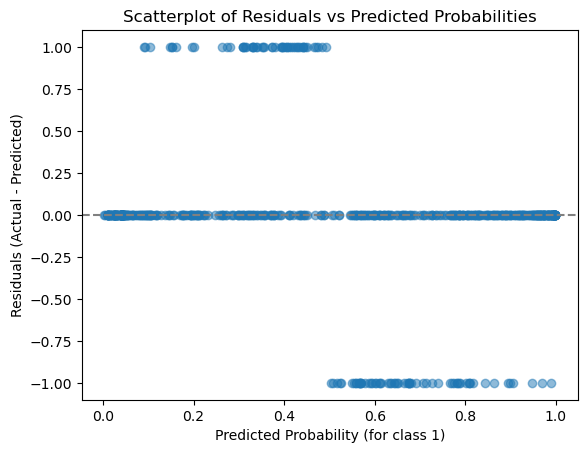

In [84]:
import matplotlib.pyplot as plt

Y_pred = logit_reg.predict(X_test_scaled)

# Calculate residuals
residuals = Y_test - Y_pred  # Assuming y_pred is binary (0 or 1) predictions from logit_reg.predict()

# Get predicted probabilities
pred_prob = logit_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Create scatter plot
plt.scatter(pred_prob, residuals, alpha=0.5)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Predicted Probability (for class 1)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Scatterplot of Residuals vs Predicted Probabilities")
plt.show()

Since there’s no visible pattern in the residuals and they’re primarily centered around zero, this indicates a well-calibrated model where errors are likely due to randomness rather than systemic issues.

## Model Evaluation

In [88]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = logit_reg.predict(X_test_scaled)

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[229  63]
 [ 53 255]]


In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from dmba import liftChart, gainsChart

# Make predictions on the test set
y_pred = logit_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)

logit_report = classification_report(Y_test, y_pred)
print("Classification Report:")
print(logit_report)

Accuracy: 0.8066666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       292
           1       0.80      0.83      0.81       308

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



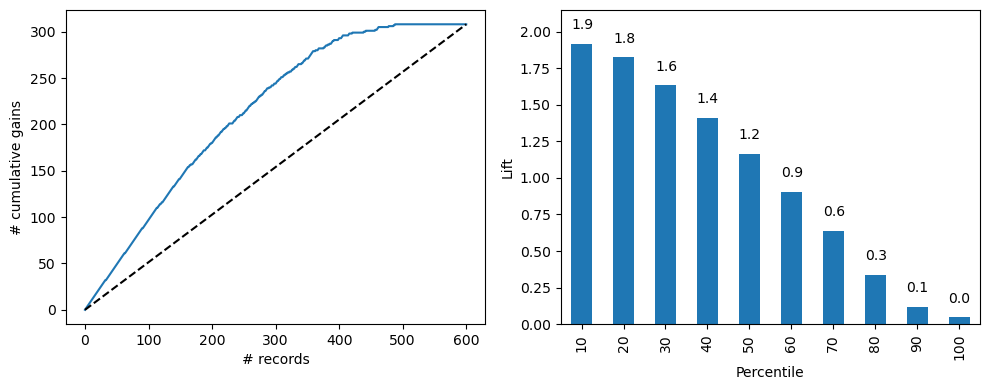

In [92]:
pred_prob = logit_reg.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for class 1

# Create DataFrame with actual values and predicted probabilities
logit_result = pd.DataFrame({'actual': Y_test, 'p(1)': pred_prob})

# Sort DataFrame by predicted probabilities
df = logit_result.sort_values(by='p(1)', ascending=False)

# Create subplots for gains and lift charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the cumulative gains chart
gainsChart(df['actual'], ax=axes[0])

# Plot the lift chart
liftChart(df['p(1)'], title=False, ax=axes[1])

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("mytest.png")
plt.show()

# Decision Tree for Purchase

In [95]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

## Model Training

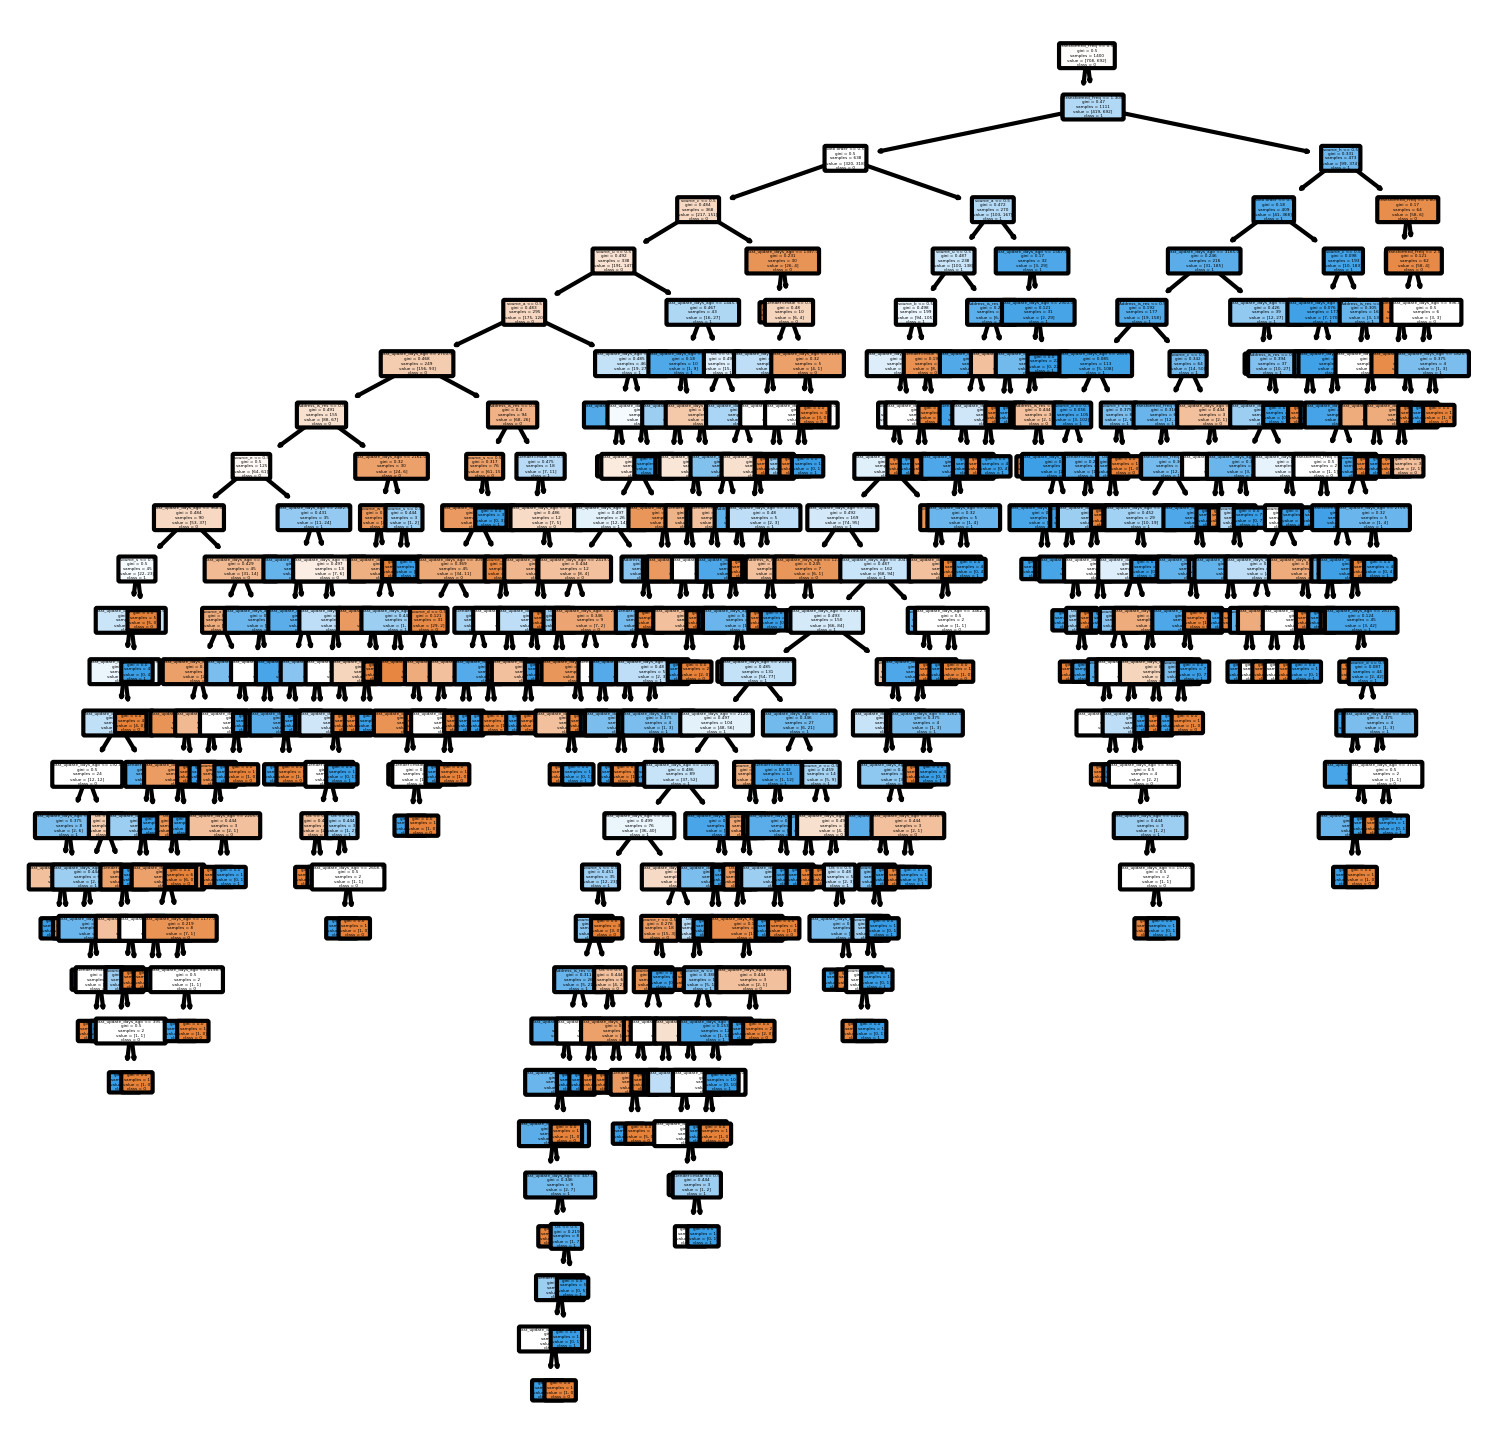

In [98]:
Y = tayko_cleaned[outcome]
X = tayko_cleaned[predictors]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#fit the tree on training data
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(X_train, Y_train)

#plot the tree
# Set dpi (100 - 300) to make image clearer than default

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

class_names = [str(cls) for cls in fullClassTree.classes_]

tree.plot_tree(fullClassTree,
           feature_names = X_train.columns, 
           class_names=class_names,
           filled = True,rounded=True);
plt.show()

## Model Evaluation

In [100]:
classificationSummary(Y_train, fullClassTree.predict(X_train))
classificationSummary(Y_test, fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.9950)

       Prediction
Actual   0   1
     0 707   1
     1   6 686
Confusion Matrix (Accuracy 0.7533)

       Prediction
Actual   0   1
     0 225  67
     1  81 227


In [101]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, X_train, Y_train, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])

Accuracy scores of each fold:  ['0.800', '0.796', '0.764', '0.757', '0.829']


## Grid Search

In [103]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [5,10, 20, 30, 40], 
    'min_samples_split': [5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) # n_jobs=-1 will utilize all available CPUs
gridSearch.fit(X_train, Y_train)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Best score:  0.8157142857142856
Best parameters:  {'max_depth': 30, 'min_impurity_decrease': 0.001, 'min_samples_split': 5}


In [104]:
param_grid = {
    'max_depth': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, Y_train)
print('Improved parameters: ', gridSearch.best_params_)

Improved parameters:  {'max_depth': 15, 'min_impurity_decrease': 0.001, 'min_samples_split': 6}


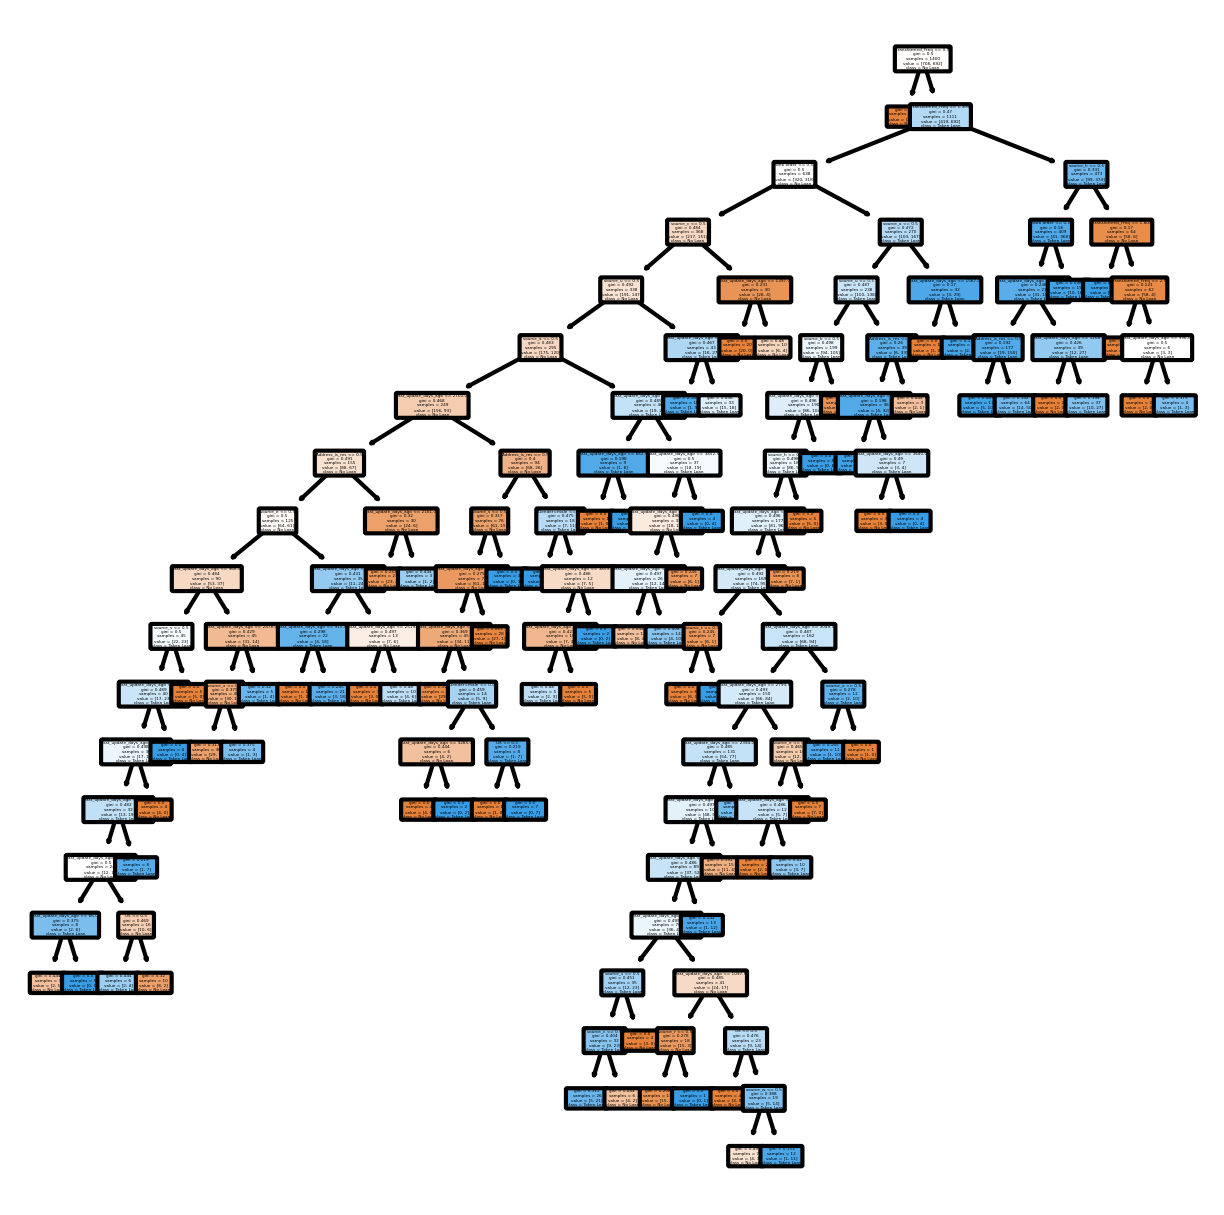

In [105]:
# Set dpi (100 - 300) to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)

tree.plot_tree(bestClassTree,
           feature_names = X_train.columns, 
           class_names={0:'No Loan', 1: "Taken Loan"},
           filled = True,rounded=True);
plt.show()

In [106]:
classificationSummary(Y_train, bestClassTree.predict(X_train))
classificationSummary(Y_test, bestClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.9029)

       Prediction
Actual   0   1
     0 613  95
     1  41 651
Confusion Matrix (Accuracy 0.7983)

       Prediction
Actual   0   1
     0 226  66
     1  55 253


## Pattern Discovery

In [108]:
# Variable importance
feature_importance = pd.DataFrame({'features': X_train.columns, 
                           'importance': bestClassTree.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)

,features,importance
5,transformed_Freq,0.466968
1,last_update_days_ago,0.186603
13,source_h,0.151619
2,Web order,0.030855
4,Address_is_res,0.026756
17,source_u,0.020861
15,source_s,0.019868
6,source_a,0.019366
10,source_e,0.016882
7,source_c,0.014614


# Conclusion 1

The decision tree model, with its higher accuracy, is recommended for predicting purchase behavior, provided further tuning (e.g., pruning or regularization) and cross-validation are applied to ensure its robustness and mitigate overfitting. This approach allows for a balance between accuracy and model reliability, making it a suitable choice if precise prediction is a priority.

# Model Selection for Spending as an Outcome

# Linear Regression

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [122]:
purchasers_data = tayko_cleaned.loc[tayko_cleaned['Purchase'] == 1]

In [124]:
new_predictors = ['US', 'last_update_days_ago', 
                     'Web order', 'Gender=male', 'Address_is_res',  
                     'transformed_Freq', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e', 
                  'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 
                  'source_t', 'source_u', 'source_p', 'source_x', 'source_w']
new_outcome = 'Spending'

In [126]:
B = purchasers_data[new_outcome]
A = purchasers_data[new_predictors]

## Model Training

In [129]:
from sklearn.model_selection import train_test_split

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3, random_state=42)

In [131]:
scaler = StandardScaler()

A_train_scaled = scaler.fit_transform(A_train)
A_test_scaled = scaler.transform(A_test)

In [133]:
Tayko_LM = LinearRegression()
Tayko_LM.fit(A_train_scaled, B_train)

LinearRegression()

In [135]:
print('intercept ', Tayko_LM.intercept_)
print(pd.DataFrame({'New_Predictor': A.columns, 'coefficient': Tayko_LM.coef_}))

# Print performance measures without shape mismatch
regressionSummary(B_train, Tayko_LM.predict(A_train_scaled))

intercept  200.21285714285713
           New_Predictor  coefficient
0                     US    -4.728215
1   last_update_days_ago   -68.347843
2              Web order    -4.460090
3            Gender=male    -7.216444
4         Address_is_res   -25.822608
5       transformed_Freq    46.258363
6               source_a    23.261225
7               source_c   -10.919633
8               source_b     4.886874
9               source_d    -0.929816
10              source_e   -13.772810
11              source_m    -6.013750
12              source_o    -5.821664
13              source_h    -2.934179
14              source_r     9.091234
15              source_s    -2.444773
16              source_t     0.533690
17              source_u    10.008092
18              source_p    -4.751086
19              source_x    -1.609296
20              source_w   -22.806968

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 187.4282
            M

## Model Evaluation

In [138]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit the multiple linear regression model using the training set
model = sm.OLS(B_train, sm.add_constant(A_train)).fit()

# Get the summary of the model
print(model.summary())

# Predict on the test set
test_predictions = model.predict(sm.add_constant(A_test))

# Calculate evaluation metrics
mse = mean_squared_error(B_test, test_predictions)
mae = mean_absolute_error(B_test, test_predictions)
print('Multiple Linear Regression - Stepwise Regression Metrics:')
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     7.286
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.45e-19
Time:                        23:06:30   Log-Likelihood:                -4656.6
No. Observations:                 700   AIC:                             9357.
Df Residuals:                     678   BIC:                             9457.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  254.2942 

### Cross Validation

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# Define the model
model = LinearRegression()

# Define custom scorers for MSE and MAE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform 5-fold cross-validation for MSE and MAE
mse_scores = cross_val_score(model, A, B, cv=5, scoring=mse_scorer)
mae_scores = cross_val_score(model, A, B, cv=5, scoring=mae_scorer)

print("Cross-Validated Mean Squared Error (MSE):", -mse_scores.mean())
print("Cross-Validated Mean Absolute Error (MAE):", -mae_scores.mean())

Cross-Validated Mean Squared Error (MSE): 40512.41700886279
Cross-Validated Mean Absolute Error (MAE): 123.40622503903239


## Decision Tree for Regression

In [144]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(A_train, B_train)
print('Initial parameters: ', gridSearch.best_params_)

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [145]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, 21, 22, 23, 24], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(A_train, B_train)
print('Improved parameters: ', gridSearch.best_params_)

Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 18}


In [147]:
regTree = gridSearch.best_estimator_

In [148]:
regressionSummary(B_train, regTree.predict(A_train))
regressionSummary(B_test, regTree.predict(A_test))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 149.0093
            Mean Absolute Error (MAE) : 92.9218
          Mean Percentage Error (MPE) : -95.5701
Mean Absolute Percentage Error (MAPE) : 120.6796

Regression statistics

                      Mean Error (ME) : 5.8338
       Root Mean Squared Error (RMSE) : 199.5166
            Mean Absolute Error (MAE) : 117.4555
          Mean Percentage Error (MPE) : -102.4994
Mean Absolute Percentage Error (MAPE) : 129.9067


In [158]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(A, B)

DecisionTreeClassifier(max_depth=1, random_state=0)

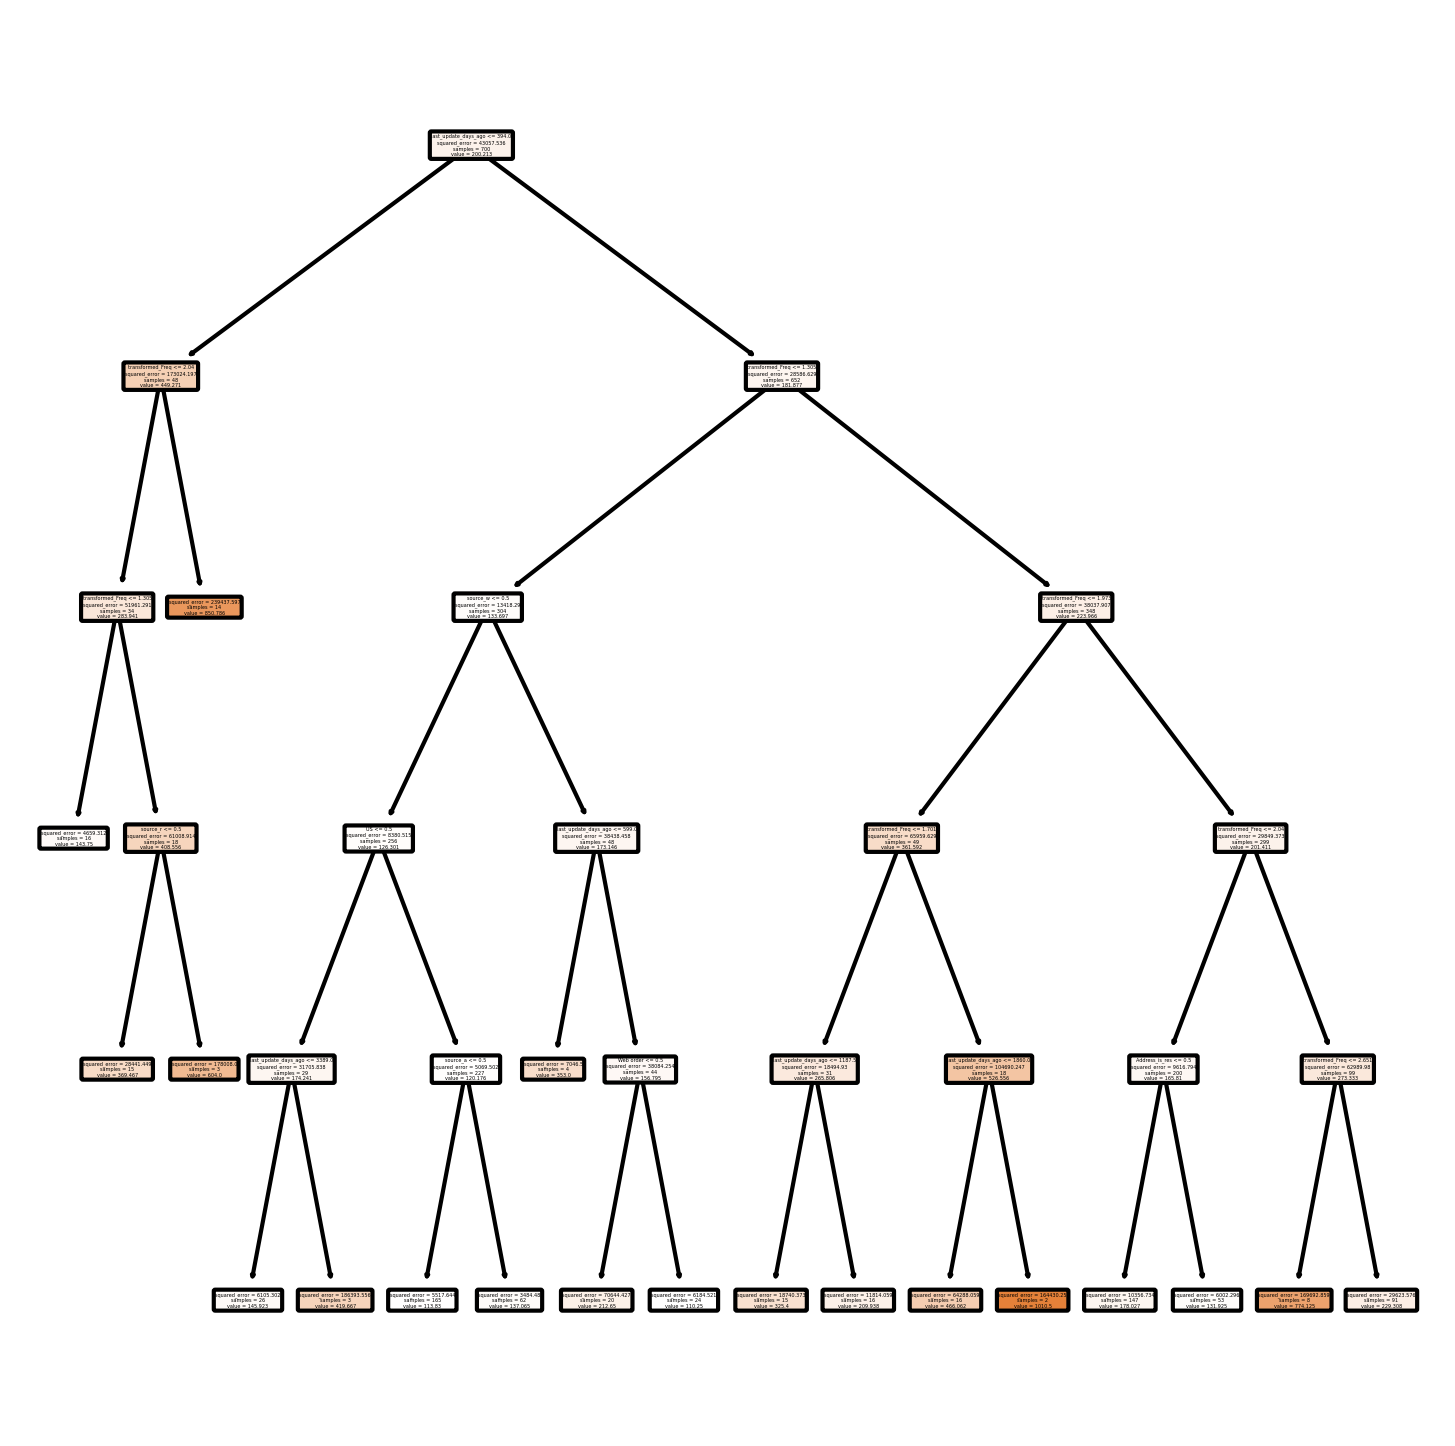

In [160]:
# Set dpi (100 - 300) to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

tree.plot_tree(regTree, 
               feature_names=A_train.columns, 
           class_names=classTree.classes_,
           filled = True,rounded=True);
plt.show()

In [ ]:
importance = pd.DataFrame({'features': A_train.columns, 
                           'importance': regTree.feature_importances_})
importance.sort_values(by='importance', ascending=False)

## Conclusion 2

Both models exhibit high errors and low explanatory power, suggesting they are not well-suited for accurately predicting spending in this dataset. Given these limitations, it may be more appropriate to refocus efforts on other target variables or to explore additional feature engineering and advanced models (such as ensemble methods) if the prediction of spending is still desired.

# Interpretation and Application:

**Key Insights**

The correlation analysis reveals key insights into factors influencing purchase activity and spending:

**Spending and Purchase Frequency (Freq)**: These are positively correlated with both Purchase and Spending. Higher frequency strongly indicates increased spending, suggesting that frequent customers are also high spenders.

**Web Order**: Shows a moderate positive correlation with Purchase, suggesting that customers making web orders are more likely to make purchases.

**Marketing Sources**: Variables such as source_a and source_u show moderate positive correlations with purchase activity, implying these sources effectively attract purchasing customers.

**Recency (last_update_days_ago)**: A negative correlation with both Purchase and Spending indicates that recent customer interactions may lead to higher purchases and spending, highlighting the importance of recent engagement.

**Recommendations:**

1. Loyalty and Rewards Program

Insight: High purchase frequency correlates with increased spending.

Recommendation: Introduce a loyalty program with exclusive offers, discounts, or early sales access to encourage repeat purchases and convert frequent buyers into long-term, high-value customers.

2. Enhancing Web Orders

Insight: Online purchases show a positive correlation with overall sales.

Recommendation: Improve the online shopping experience with personalized recommendations, a streamlined checkout, and exclusive online discounts. Promote these features to boost web-based purchases and engagement.

3. Optimizing Marketing Channels

Insight: Channels "source_a" and "source_u" are linked with higher spending and purchase rates.

Recommendation: Increase resources for high-performing channels and replicate their successful tactics across underperforming channels to drive broader customer acquisition.

4. Re-Engagement Strategy

Insight: Recent interactions correlate with increased purchase likelihood.

Recommendation: Implement re-engagement campaigns targeting inactive customers through personalized emails and automated reminders, sustaining engagement and boosting sales.

5. Cohesive Strategy

Approach: Segment customers by purchase frequency, recency, and channel, enabling targeted campaigns and optimized channel investments. Continuously monitor loyalty and online campaigns, using customer feedback to refine strategies.
To maximize the effectiveness of these recommendations, an integrated approach should be adopted:

**Customer Segmentation:** Segment customers based on their purchase frequency, engagement recency, and source channel. This allows for tailored strategies aimed at high-frequency buyers, recently inactive customers, and individuals engaging via specific sources.

**Targeted Marketing Campaigns**: Leverage insights on effective sources and web order correlations to design campaigns targeted at different customer segments. For instance, offer exclusive promotions through web orders to capture high-purchase-intent customers online while allocating more resources to channels that yield higher engagement.

**Feedback and Iteration**: Continuously monitor the effectiveness of loyalty programs, online promotions, and channel-specific marketing strategies. Gather customer feedback on online experiences and refine the approach based on evolving trends and preferences.
